<a href="https://colab.research.google.com/github/nandinijirobe/Allstate_AIStudio_Project/blob/main/Allstate_AI_Studio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Packages**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive

# **Part 1: Load the Data Set**
Note: To be able to access the Fire Data in this Colab, you must add the shared drive with the data files as a shortcut to your personal drive

In [4]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()

for year in range(1992, 1997):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df1 = pd.concat([df1, new_data], axis=0)

for year in range(1998, 2003):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df2 = pd.concat([df2, new_data], axis=0)

for year in range(2004, 2009):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df3 = pd.concat([df3, new_data], axis=0)

for year in range(2010, 2015):
  file_path = f'/content/drive/My Drive/Allstate (VIR) - Wildfire Incidence and Property Insurance: A Data-Driven Analysis (Team B)/AllstateDataFiles/fires_'+str(year)+ '.csv'
  new_data = pd.read_csv(file_path)
  df4 = pd.concat([df4, new_data], axis=0)

df1.reset_index(inplace=True)
df2.reset_index(inplace=True)
df3.reset_index(inplace=True)
df4.reset_index(inplace=True)

<ipython-input-5-7bf70e55824d>:8: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-5-7bf70e55824d>:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-5-7bf70e55824d>:8: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-5-7bf70e55824d>:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-5-7bf70e55824d>:8: DtypeWarning: Columns (11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(file_path)
<ipython-input-5-7bf70e55824d>:13: DtypeWarning: Columns (11,19,29,31) have mixed types. Specify dtype option on import or set low_memor

# **Part 1.1: Inspecting the data**

In [6]:
# What is the size of my dataset?
print(df1.shape)
# What are my features and their datatypes?
print(df1.dtypes)
# View one of the dataframes
df1.head(5)

(352965, 50)
index                           int64
Unnamed: 0                      int64
OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_INCIDENT_ID              object
FIRE_NAME                      object
FIRE_YEAR                       int64
DISCOVERY_DATE                 object
DISCOVERY_DOY                   int64
DISCOVERY_TIME                float64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                      object
CONT_DOY                      float64
CONT_TIME                     float64
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64

,index,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,agency_Country,agency_State,agency_Code,agency_Name,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,fips_state_cd,county_fips
0,0,41875,41876,42087,FS-255009,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-113.078346,-113.078331,45.359993,45.360001,30,0
1,1,41876,41877,42088,FS-255013,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.683334,-112.683319,44.539993,44.540001,30,0
2,2,41877,41878,42089,FS-255017,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.983345,-112.983330,44.516666,44.516670,30,0
3,3,41878,41879,42090,FS-255018,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.730003,-112.729988,44.689999,44.690006,30,0
4,4,41879,41880,42091,FS-255024,FED,FS-FIRESTAT,FS,USMTBDF,Beaverhead/Deerlodge National Forest,...,US,MT,BDF,Beaverhead/Deerlodge National Forest,-112.820015,-112.820000,45.763332,45.763340,30,0


In [7]:
# Inspecting columns LATITUDE, LONGITUDE, STATE, COUNTY, FIPS_CODE, FIPS_NAME, bbox_xmin,bbox_xmax, bbox_ymin, bbox_ymax, county_fips
# Latitude from 19.50139 to 64.85694 and longitude from -161.75583 to -68.01197 in the USA
col_list1 = ['LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'bbox_xmin','bbox_xmax', 'bbox_ymin', 'bbox_ymax', 'county_fips']
df_summ1 = df1[col_list1].describe(include='all')
df_summ1
# Columns with county_fips = 0 will be removed
# county_fips info: https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
# (678608, 37)


,LATITUDE,LONGITUDE,STATE,COUNTY,FIPS_CODE,FIPS_NAME,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,county_fips
count,352965.000000,352965.000000,352965,186196,186196.000000,186196,352965.000000,352965.000000,352965.000000,352965.000000,352965.000000
unique,NaN,NaN,52,1098,NaN,851,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,CA,McCurtain,NaN,Cherokee,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,44311,1893,NaN,2186,NaN,NaN,NaN,NaN,NaN
mean,37.018148,-97.411178,NaN,NaN,89.763701,NaN,-97.411185,-97.411171,37.018145,37.018150,14585.127823
std,5.801915,16.626824,NaN,NaN,84.367257,NaN,16.626825,16.626823,5.801914,5.801915,18190.931858
min,17.983333,-166.869400,NaN,NaN,1.000000,NaN,-166.869400,-166.869385,17.983332,17.983334,0.000000
25%,33.143700,-113.076910,NaN,NaN,29.000000,NaN,-113.076912,-113.076897,33.143700,33.143703,0.000000
50%,35.198333,-92.130828,NaN,NaN,69.000000,NaN,-92.130829,-92.130821,35.198330,35.198334,1121.000000
75%,40.433300,-82.560000,NaN,NaN,119.000000,NaN,-82.560013,-82.559998,40.433296,40.433300,28073.000000


# **Part 2: Data Understanding & Data Preparation**
Resources: Unit 2 of Machine Learning Foundations

**In this section we are going to the following:**
1.   Perform exploratory data analysis (EDA) to understand our data, identify key variables, and assess data quality.
2.   Clean and preprocess your data, handle missing values and outliers, and transform our data into a suitable format for modeling.

**Tasks for this month:**
1. Define the problem: What problem is the model solving? What is the label that is being predicted?
2. Remove columns we know for sure will not help the machine learning model
3. Checking for missing data and fix it
4. Feature engineering/transformation?
4. Data Visualization: see which feature correlate with the label the most, remove outliers, look for skews, observe distribution
3. Data Cleaning: Clean datasets appropriately depending on above results

**Notes about expectations and datasets:**
*  Goal: Understand the factors influencing the frequency and severity of wildfires and how these factors pose as potential risks for the property insurance  industry.
*  We would like to know where we should start offering and stop offering home insurance.
*  There is over a million examples in the fire dataset. It contains info about which counties and states wildfires have occured, the severity and the cause.
*  We have been given county_level_population dataset which shares a common column with fires datasets: county_fips.

**Things we can predict using machine learning:**
*  We can predict the *cause* of the wild fire based on the region, month, date and time.
*  We can predict the *severity* of wild fire based on cause, region, month, date and time. We can use this information with the county_level_population dataset to understand how Allstate homes will affected.

**Questions**
1.   What does the allstate_policies and allstate_pif_fraction mean?
2.   Are any class imbalance issues in this dataset? (chapter 2.1)












In [8]:
# Dropping unnecessary columns
drop_list = [
    "Unnamed: 0","OBJECTID", "FPA_ID", "SOURCE_SYSTEM_TYPE", "SOURCE_SYSTEM",
    "NWCG_REPORTING_UNIT_ID", "NWCG_REPORTING_UNIT_NAME", "SOURCE_REPORTING_UNIT",
    "SOURCE_REPORTING_UNIT_NAME", "LOCAL_INCIDENT_ID", "FIRE_NAME", "OWNER_CODE", "OWNER_DESCR", "fips_state_cd",
    "agency_UnitId", "agency_GeographicArea", "agency_Gacc", "agency_WildlandRole", "agency_UnitType", "FIRE_SIZE_CLASS",
    "agency_Department", "agency_Agency", "agency_Country", "agency_State", "agency_Code", "agency_Name", "STAT_CAUSE_DESCR"
]

def drop_unnecessary_columns(df):
    df.drop(drop_list, axis=1,  inplace = True)
    return df

In [9]:
def round_col_values(df, col_name, num_dec):
  df = df.round({col_name: num_dec})
  return df

def remove_null_county_fips(df):
  df = df[df['county_fips'] != 0]
  return df

# TODO: Add other different cleaning functions here
def encode_fire_cause(df):
  fire_cause_one_hot = pd.get_dummies(df['STAT_CAUSE_CODE'])
  fire_cause_one_hot.rename(columns={1: "Cause 1", 2: "Cause 2", 3: "Cause 3", 4: "Cause 4", 5: "Cause 5", 6: "Cause 6",
                                     7: "Cause 7", 8: "Cause 8", 9: "Cause 9", 10: "Cause 10", 11: "Cause 11", 12: "Cause 12", 13: "Cause 13"}, inplace=True)
  df = pd.concat([df, fire_cause_one_hot], axis=1)
  df = df.drop("STAT_CAUSE_CODE", axis=1)
  return df

# NOT IN USE 10/29
# def encode_fire_size_class(df):
#   fire_cause_one_hot = pd.get_dummies(df['FIRE_SIZE_CLASS'])
#   fire_cause_one_hot.head()
#   df = df.join(fire_cause_one_hot)
#   df = df.drop("FIRE_SIZE_CLASS", axis=1)
#   return df

# NEW CODE 10/29
def encode_nwcg_class(df):
  fire_cause_one_hot = pd.get_dummies(df['NWCG_REPORTING_AGENCY'])
  df = df.drop("NWCG_REPORTING_AGENCY", axis=1)
  df = pd.concat([df, fire_cause_one_hot], axis=1)
  #print(df.shape)
  return df


state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

def encode_state_class(df):
  fire_cause_one_hot = pd.get_dummies(df['STATE'])
  fire_cause_one_hot.rename(columns= state_abbreviations, inplace=True)
  df = pd.concat([df, fire_cause_one_hot], axis=1)
  df = df.drop("STATE", axis=1)
  return df

# NEW CODE 10/29
def encode_county_fips_class(df):
  fire_cause_one_hot = pd.get_dummies(df['county_fips'])
  fire_cause_one_hot.head()
  df = pd.concat([df, fire_cause_one_hot], axis=1)
  df = df.drop("county_fips", axis=1)
  return df

def contained_same_day(df):
  df['contained_same_day'] = np.where(df['DISCOVERY_DATE'] == df['CONT_DATE'], True, False)
  return df

def fire_contained_date(df):
  #df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], errors='coerce')
  df['Contained Month'] = df['CONT_DATE'].str[5:7]
  df['Contained Day'] = df['CONT_DATE'].str[8:]
  return df

def fire_discovery_date(df):
  df['Discovery Month'] = df['DISCOVERY_DATE'].str[5:7]
  df['Discovery Day'] = df['DISCOVERY_DATE'].str[8:]
  return df

def fire_discovery_doy(df):
  df['Day of the Year'] = df['DISCOVERY_DOY']
  return df

def categorize_time(time):
    if 600 <= time < 1200:
        return "Morning"
    elif 1200 <= time < 1800:
        return "Afternoon"
    elif 1800 <= time < 2400:
        return "Evening"
    else:
        return "Night"

def fire_discovery_time(df):
  df['Discovery Time'] = df['DISCOVERY_TIME'].apply(categorize_time)
  return df

def fire_year(df):
  df['Fire_Year'] = df['FIRE_YEAR']
  return df

def fod_id(df):
  df['FOD_ID'] = df['FOD_ID']
  return df

In [10]:
def clean_cont_time(df):
  df['Contained Time'] = df['CONT_TIME'].apply(categorize_time)
  return df

def clean_fire_size(df):
  df['FIRE_SIZE'] = pd.to_numeric(df['FIRE_SIZE'], errors='coerce')
  df['FIRE_SIZE'].fillna(np.nan, inplace=True)
  return df

def clean_fire_size_class(df):
  size_class_mapping = {
        'A': '0-0.25 Acres',
        'B': '0.26-9.9 Acres',
        'C': '10.0-99.9 Acres',
        'D': '100-299 Acres',
        'E': '300-999 Acres',
        'F': '1000-4999 Acres',
        'G': '5000+ Acres',
        'H': '10000-49999 Acres',
        'I': '50000-99999 Acres',
        'J': '100000-499999 Acres',
        'K': '500000-999999 Acres',
        'L': '1000000+ Acres'
    }

  df['FIRE_SIZE_CLASS'] = df['FIRE_SIZE_CLASS'].map(size_class_mapping)
  return df

def clean_latitude(df):
  df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
  df['LATITUDE'].fillna(np.nan, inplace=True)
  return df



# Dropping unnecessary columns
drop_old = ['FIRE_YEAR', 'FIRE_YEAR', 'DISCOVERY_DATE', "FIPS_CODE",
            'DISCOVERY_TIME', 'CONT_DATE', 'CONT_TIME', 'COUNTY', 'FIPS_NAME', 'FOD_ID', "index", "CONT_DOY"]
def drop_old_cols(df):
    df.drop(drop_old, axis=1,  inplace = True)
    return df


In [11]:
def clean_this_df(df):
  # TODO: apply more functions to df here
  df = drop_unnecessary_columns(df)
  for col in ['LONGITUDE', 'LATITUDE', 'bbox_xmin','bbox_xmax','bbox_ymin','bbox_ymax']:
    df = round_col_values(df, col, 2)
  df = remove_null_county_fips(df)

  #df = encode_nwcg_class(df) # new code 10/29
  #df = encode_state_class(df)
  #df = encode_county_fips_class(df) # new code 10/29
  #df = encode_fire_cause(df)

  df = contained_same_day(df)
  # df = fod_id(df)
  # df = fire_contained_date(df)
  # df = fire_discovery_date(df)
  df = fire_discovery_time(df)
  df = fire_discovery_doy(df)
  df = fire_year(df)
  df = clean_cont_time(df)
  df = clean_fire_size(df)
  # df = clean_fire_size_class(df)
  df = clean_latitude(df)
  df = drop_old_cols(df)
  return df

In [12]:
fraction = 0.8
sampled_df = pd.concat([df1.sample(frac=fraction), df2.sample(frac=fraction), df3.sample(frac=fraction), df4.sample(frac=fraction)])
print(sampled_df.shape)
print(sampled_df["FIRE_YEAR"].unique())
sampled_df.head(10)

(1278350, 50)
[1995 1996 1994 1993 1992 2001 2000 1999 1998 2002 2008 2007 2005 2006
 2004 2014 2013 2010 2011 2012]


,index,Unnamed: 0,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,agency_Country,agency_State,agency_Code,agency_Name,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,fips_state_cd,county_fips
247752,41833,797291,797292,903556,SCHMIDT_55002323,NONFED,ST-WIWIS,ST/C&L,USWIWIS,Wisconsin Department of Natural Resources,...,US,WI,WIS,Wisconsin Department of Natural Resources,-90.856461,-90.856445,43.113586,43.113594,55,55023
345377,67986,1404273,1404274,19100256,SFO-GA-MAC-5-11/6/1996-1730,NONFED,ST-GAGAS,ST/C&L,USGAGAS,Georgia Forestry Commission,...,US,GA,GAS,Georgia Forestry Commission,-84.076202,-84.076187,32.304298,32.304302,13,13193
331274,53883,1021867,1021868,1151446,TFS_NC_200426,NONFED,ST-NCNCS,ST/C&L,USNCNCS,North Carolina Forest Service,...,US,NC,NCS,North Carolina Forest Service,-81.031700,-81.031693,35.224998,35.225006,37,0
144319,14355,75253,75254,76123,FS-300802,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,...,US,CA,TMU,Lake Tahoe Basin Management Unit,-120.033348,-120.033333,38.916660,38.916668,6,0
190846,60882,1106196,1106197,1346996,CDF_1994_54_2235_101,NONFED,ST-CACDF,ST/C&L,USCAAEU,Amador-El Dorado Unit,...,US,CA,AEU,Amador-El Dorado Unit,-120.806114,-120.806099,38.503887,38.503895,6,0
187367,57403,1012316,1012317,1141766,TFS_NC_190694,NONFED,ST-NCNCS,ST/C&L,USNCNCS,North Carolina Forest Service,...,US,NC,NCS,North Carolina Forest Service,-80.561707,-80.561699,35.368298,35.368301,37,0
317520,40129,762040,762041,863830,WA_3972,NONFED,ST-WAWAS,ST/C&L,USWAWAS,Washington State Headquarters,...,US,WA,WAS,Washington State Headquarters,-117.381783,-117.381767,47.763729,47.763737,53,53063
333850,56459,1096379,1096380,1335215,CDF_1996_53_2211_228,NONFED,ST-CACDF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,...,US,CA,LNU,Sonoma-Lake Napa Unit,-122.583069,-122.583054,38.776943,38.776951,6,0
145255,15291,177922,177923,180060,W-328431,FED,DOI-WFMI,BIA,USNDTMA,Turtle Mountain Agency,...,US,ND,TMA,Turtle Mountain Agency,-99.908203,-99.908188,48.890793,48.890800,38,0
70147,2172,55475,55476,55958,FS-280491,FED,FS-FIRESTAT,FS,USNMLNF,Lincoln National Forest,...,US,NM,LNF,Lincoln National Forest,-105.400002,-105.399986,33.466663,33.466667,35,0


In [13]:
sampled_df = clean_this_df(sampled_df)
print(sampled_df.shape)

(808753, 17)


In [14]:
sampled_df = encode_nwcg_class(sampled_df)
print(sampled_df.shape)
sampled_df = encode_fire_cause(sampled_df)
print(sampled_df.shape)
sampled_df = encode_state_class(sampled_df)
print(sampled_df.shape)
sampled_df = encode_county_fips_class(sampled_df)
print(sampled_df.shape)

(808753, 27)
(808753, 39)
(808753, 89)
(808753, 2786)


In [ ]:
oldSize = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] ;

print(df1.shape)
df1 = clean_this_df(df1)
print(df1.shape)
print()

print(df2.shape)
df2 = clean_this_df(df2)
print(df2.shape)
print()

print(df3.shape)
df3 = clean_this_df(df3)
print(df3.shape)
print()

print(df4.shape)
df4 = clean_this_df(df4)
print(df4.shape)

newSize = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] ;

(352965, 50)
(186196, 1262)

(416392, 50)
(167037, 1572)

(452838, 50)
(339046, 2471)

(375743, 50)
(317971, 2682)


In [ ]:
# This shows that about 37% of the examples had to be removed
print(newSize)
print(oldSize)
print(float(newSize/oldSize) * 100)

1010250
1597938
63.222102484577


In [ ]:
# Change/Add df1 to view summary of other dfs
df_summ1 = df4.describe(include='all')
df_summ1

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,BIA,BLM,...,Cause 9,Cause 10,Cause 11,Cause 12,Cause 13,contained_same_day,Discovery Time,Day of the Year,Fire_Year,Contained Time
count,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,...,317971.000000,317971.000000,317971.000000,317971.000000,317971.000000,317971,317971,317971.000000,317971.000000,317971
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,Afternoon,NaN,NaN,Night
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,172760,144787,NaN,NaN,131572
mean,168.548063,69.533273,36.327775,-94.648180,-94.648223,-94.648133,36.327734,36.327822,0.000016,0.052511,...,0.221275,0.005117,0.019980,0.003519,0.079633,NaN,NaN,168.548063,2011.944592,NaN
std,92.095743,2523.101904,5.181300,15.652185,15.652195,15.652174,5.181282,5.181320,0.003965,0.223056,...,0.415106,0.071349,0.139931,0.059218,0.270725,NaN,NaN,92.095743,1.405547,NaN
min,1.000000,0.000010,17.940000,-160.760000,-160.760000,-160.760000,17.940000,17.940000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000,2010.000000,NaN
25%,91.000000,0.100000,32.580000,-104.890000,-104.890000,-104.890000,32.580000,32.580000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,91.000000,2011.000000,NaN
50%,169.000000,1.000000,35.190000,-92.590000,-92.590000,-92.590000,35.190000,35.190000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,169.000000,2012.000000,NaN
75%,237.000000,3.000000,40.260000,-82.160000,-82.160000,-82.160000,40.260000,40.260000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,237.000000,2013.000000,NaN


In [ ]:
print(df1.columns)

Index([     'DISCOVERY_DOY',          'FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',                'BLM',
                       'FS',
       ...
                  'Cause 9',           'Cause 10',           'Cause 11',
                 'Cause 12',           'Cause 13', 'contained_same_day',
           'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time'],
      dtype='object', length=1262)


# **QUESTIONS**

Summary and questions:

The goal of our machine learning model is predict the severity of the wildfire based on factors such as cause, region, month, date, and time. The label of this machine learning model would be either FIRE_SIZE' or 'FIRE_SIZE_CLASS'. After the ML model model predicted this, we planned on using county_fips code which we already have, look into the population dataset to understand how many Allstate insured homes would be impacted.

Questions I have:
1.  What is the purpose of merging the population dataset and fire dataset? None of columns will help us predict the severity of a wildfire. Were we thinking about making the # of Allstate homes the label? If so, how will factors such as fire discovery date or stats cause supposed to help predict this label? Should we keep this separate? -> ask James
2. Is discovery day of the year necessary when we already have discovery month and date? -> take out if not needed
3. Now that we have kept the NWCG_REPORTING_AGENCY, do we need to one hot encode it since its a categorical value? -> ONE HOT ENCODE THIS
4. Not including SOURCE_REPORTING_UNIT_NAME either

About NWCF_REP
Tasks:
1. I think we can remove fips code (3-digit code) and just keep county_fips. They are both different things but we only will use county_fips to relate to the population dataset.
2. We need to ensure that county_fips is a categorical value! Perhaps one-hot encode this as the number itself does not provide any value in predicting the severity of the wildfire.
3. We should remove either fire_size or fire_size class. We only need to one of them. Fire size class will need to be one hot encoded. LETS REMOVE FIRE SIZE CLASS


Things we didn't have time for:
1. We removed about 37% of the examples because they did not contain a county_fips code which was needed to use both population and fire datasets. We planned on finding the county fips code ourselves by using the coordinates and API but we did not have the time for this.



## **DATA VISUALIZATION:**

Everything we need for this section is here: https://lms.ecornell.com/courses/1710631/pages/code-bivariate-plotting-with-seaborn?module_item_id=26782762


Notes:
1.   We can make a histogram (univariate plotting) to view which counties most of the data is from. We want our data to represent each county. Having more examples for a specific county can affect the ML model's predictions. Lets do this at the state level
2.  Scatter plots see which columns to keep and remove. We want 0 correlation between induvidual features. We want correlations close to 1 or -1 for relationships between features and labels. However this assumes a linear relationship between feature and label which isn't always true especially in real data.
3. Bivariate plotting might be a better choice. We can work with 3-4 features and 1 label at a time so view all the graphs properly. We can meet with the AI Studio TA if necessary to get help on interpreting them.
3. Do we need to do outlier detection? If so, for what? I already check if all the coords are in or near the US region.



In [ ]:
sns.relplot(x="STAT_CAUSE_CODE", y="Contained Time",
data=df1.sample(frac=0.001))

NameError: ignored

In [ ]:
sns.regplot(x="STAT_CAUSE_CODE",
y="Contained Time", data=df1.sample(frac=0.01))

In [ ]:
sns.pairplot(df1.sample(frac=0.0001))

In [ ]:
df1.columns

Index([     'DISCOVERY_DOY',          'FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',                'BLM',
                       'FS',
       ...
                  'Cause 9',           'Cause 10',           'Cause 11',
                 'Cause 12',           'Cause 13', 'contained_same_day',
           'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time'],
      dtype='object', length=1262)

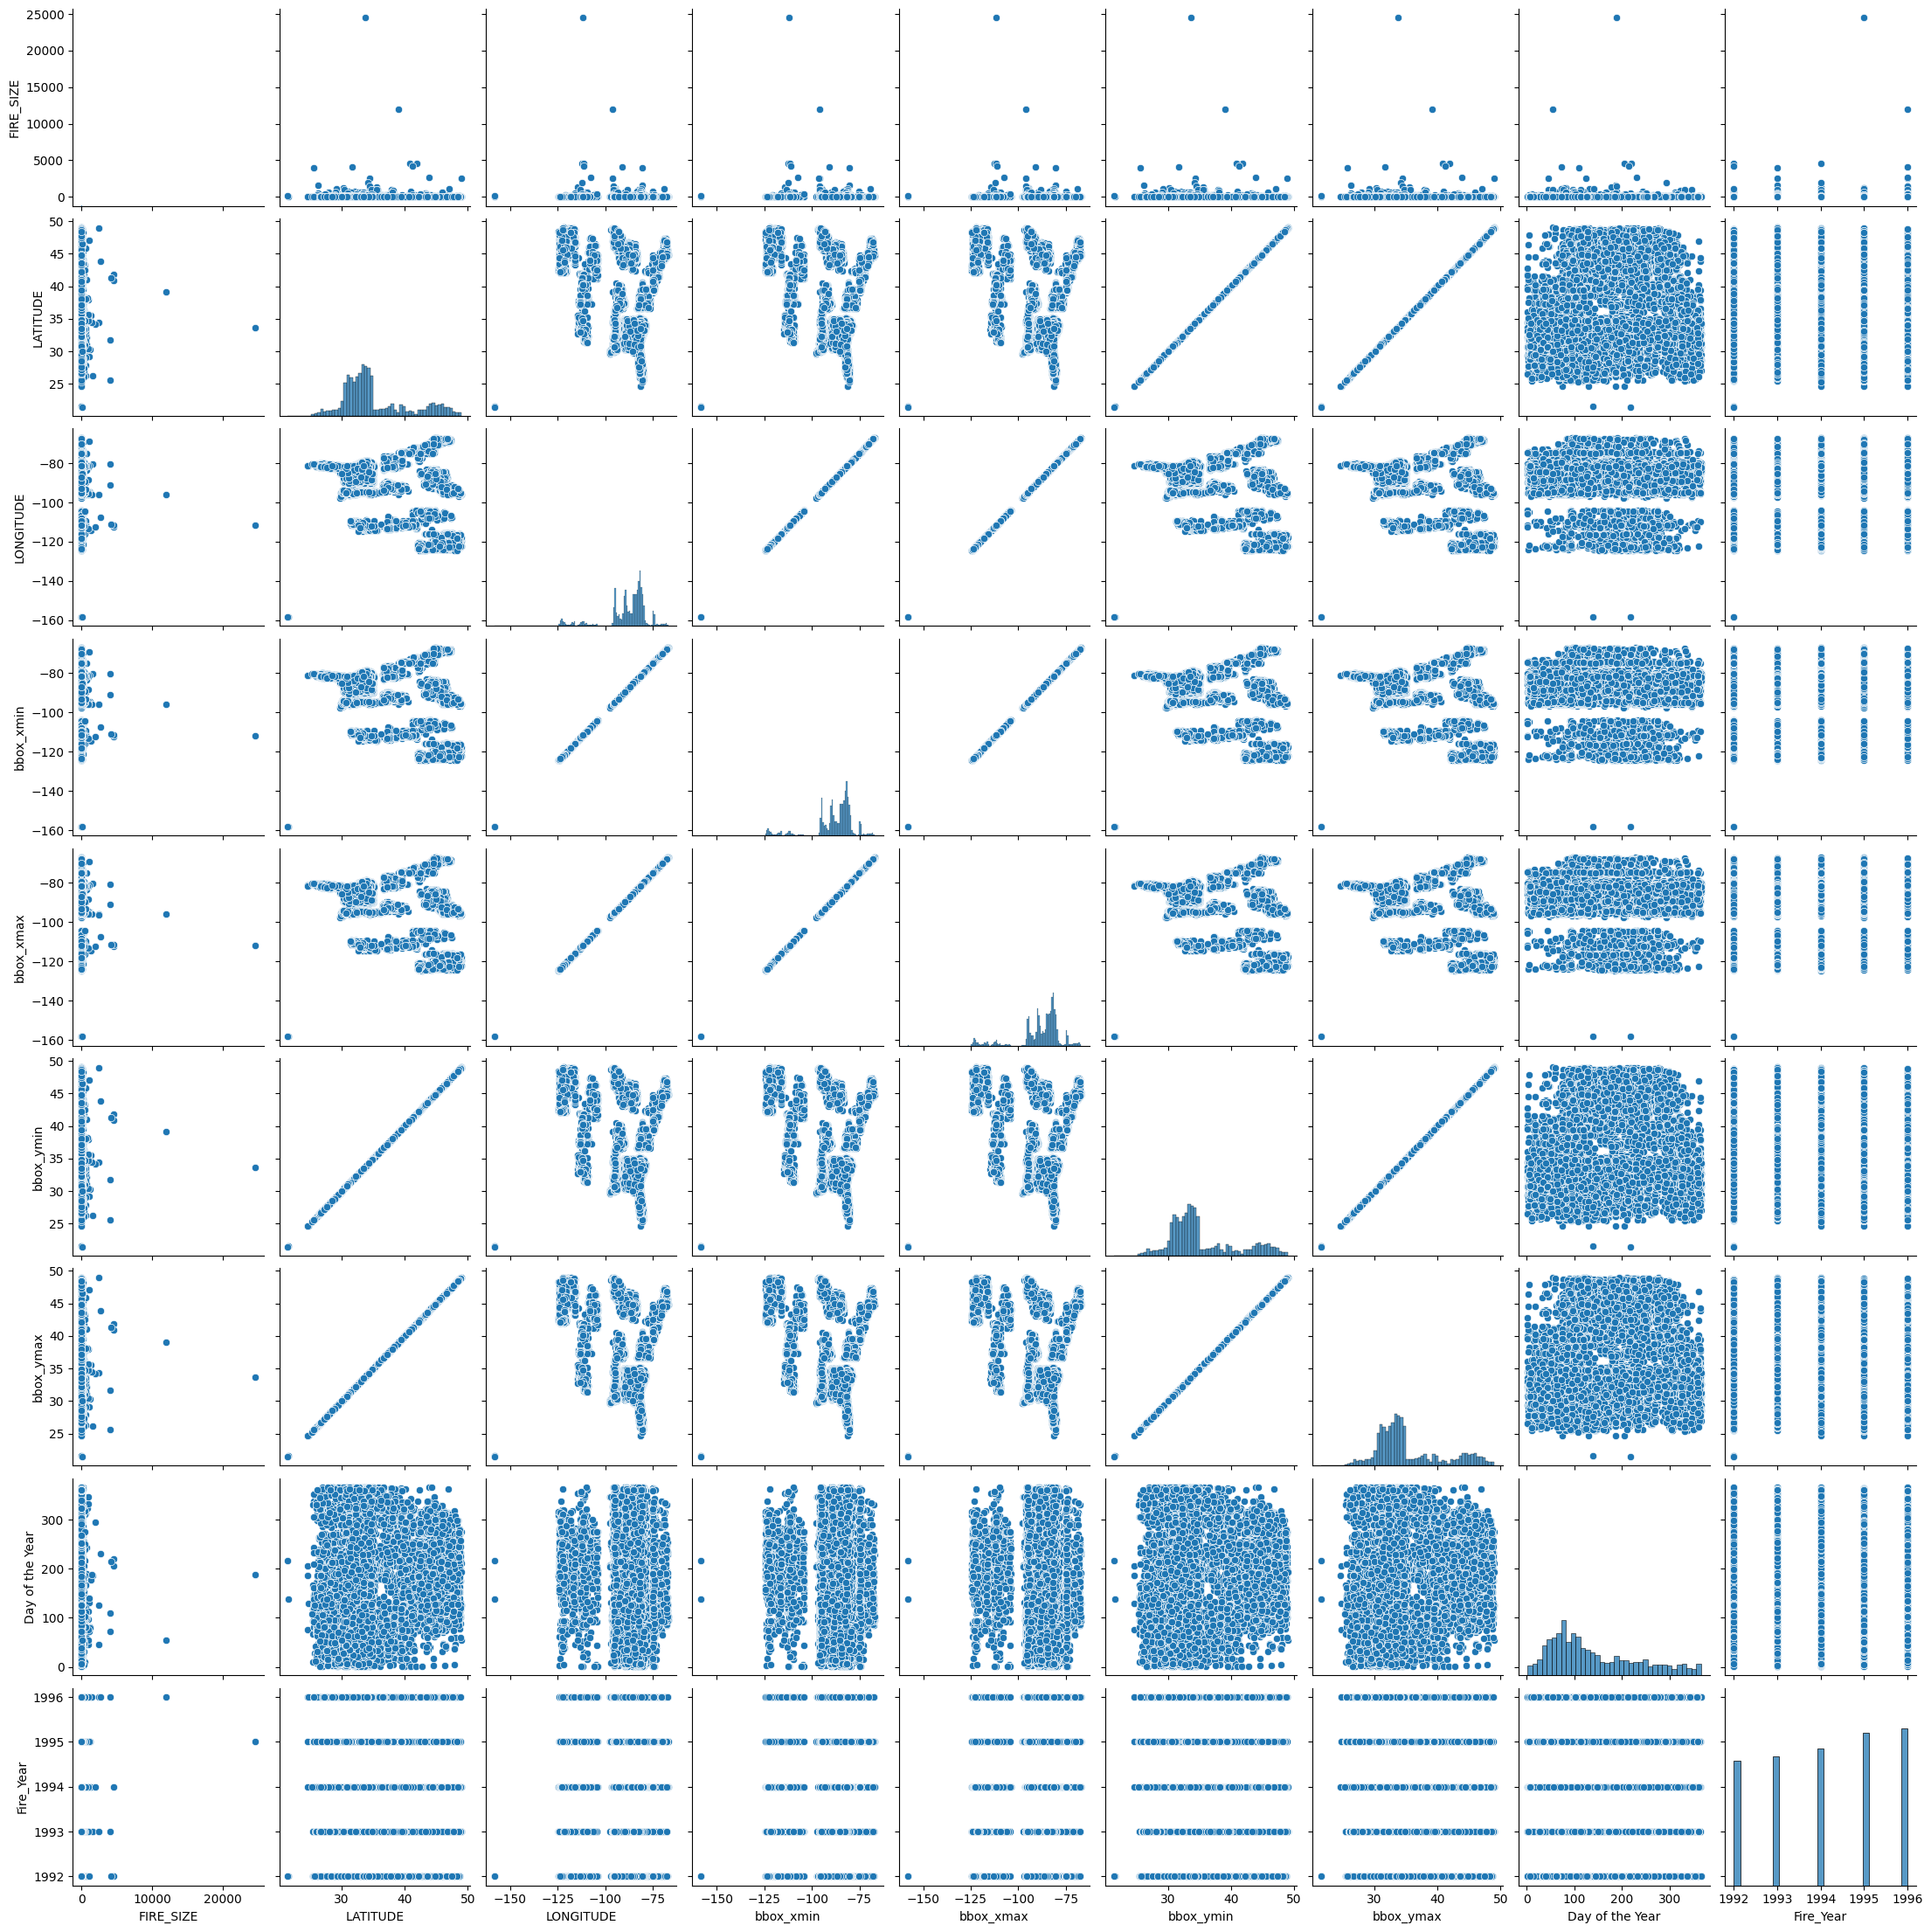

In [ ]:
sns.pairplot(df1[['FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',
                 'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time']].sample(frac = 0.1))

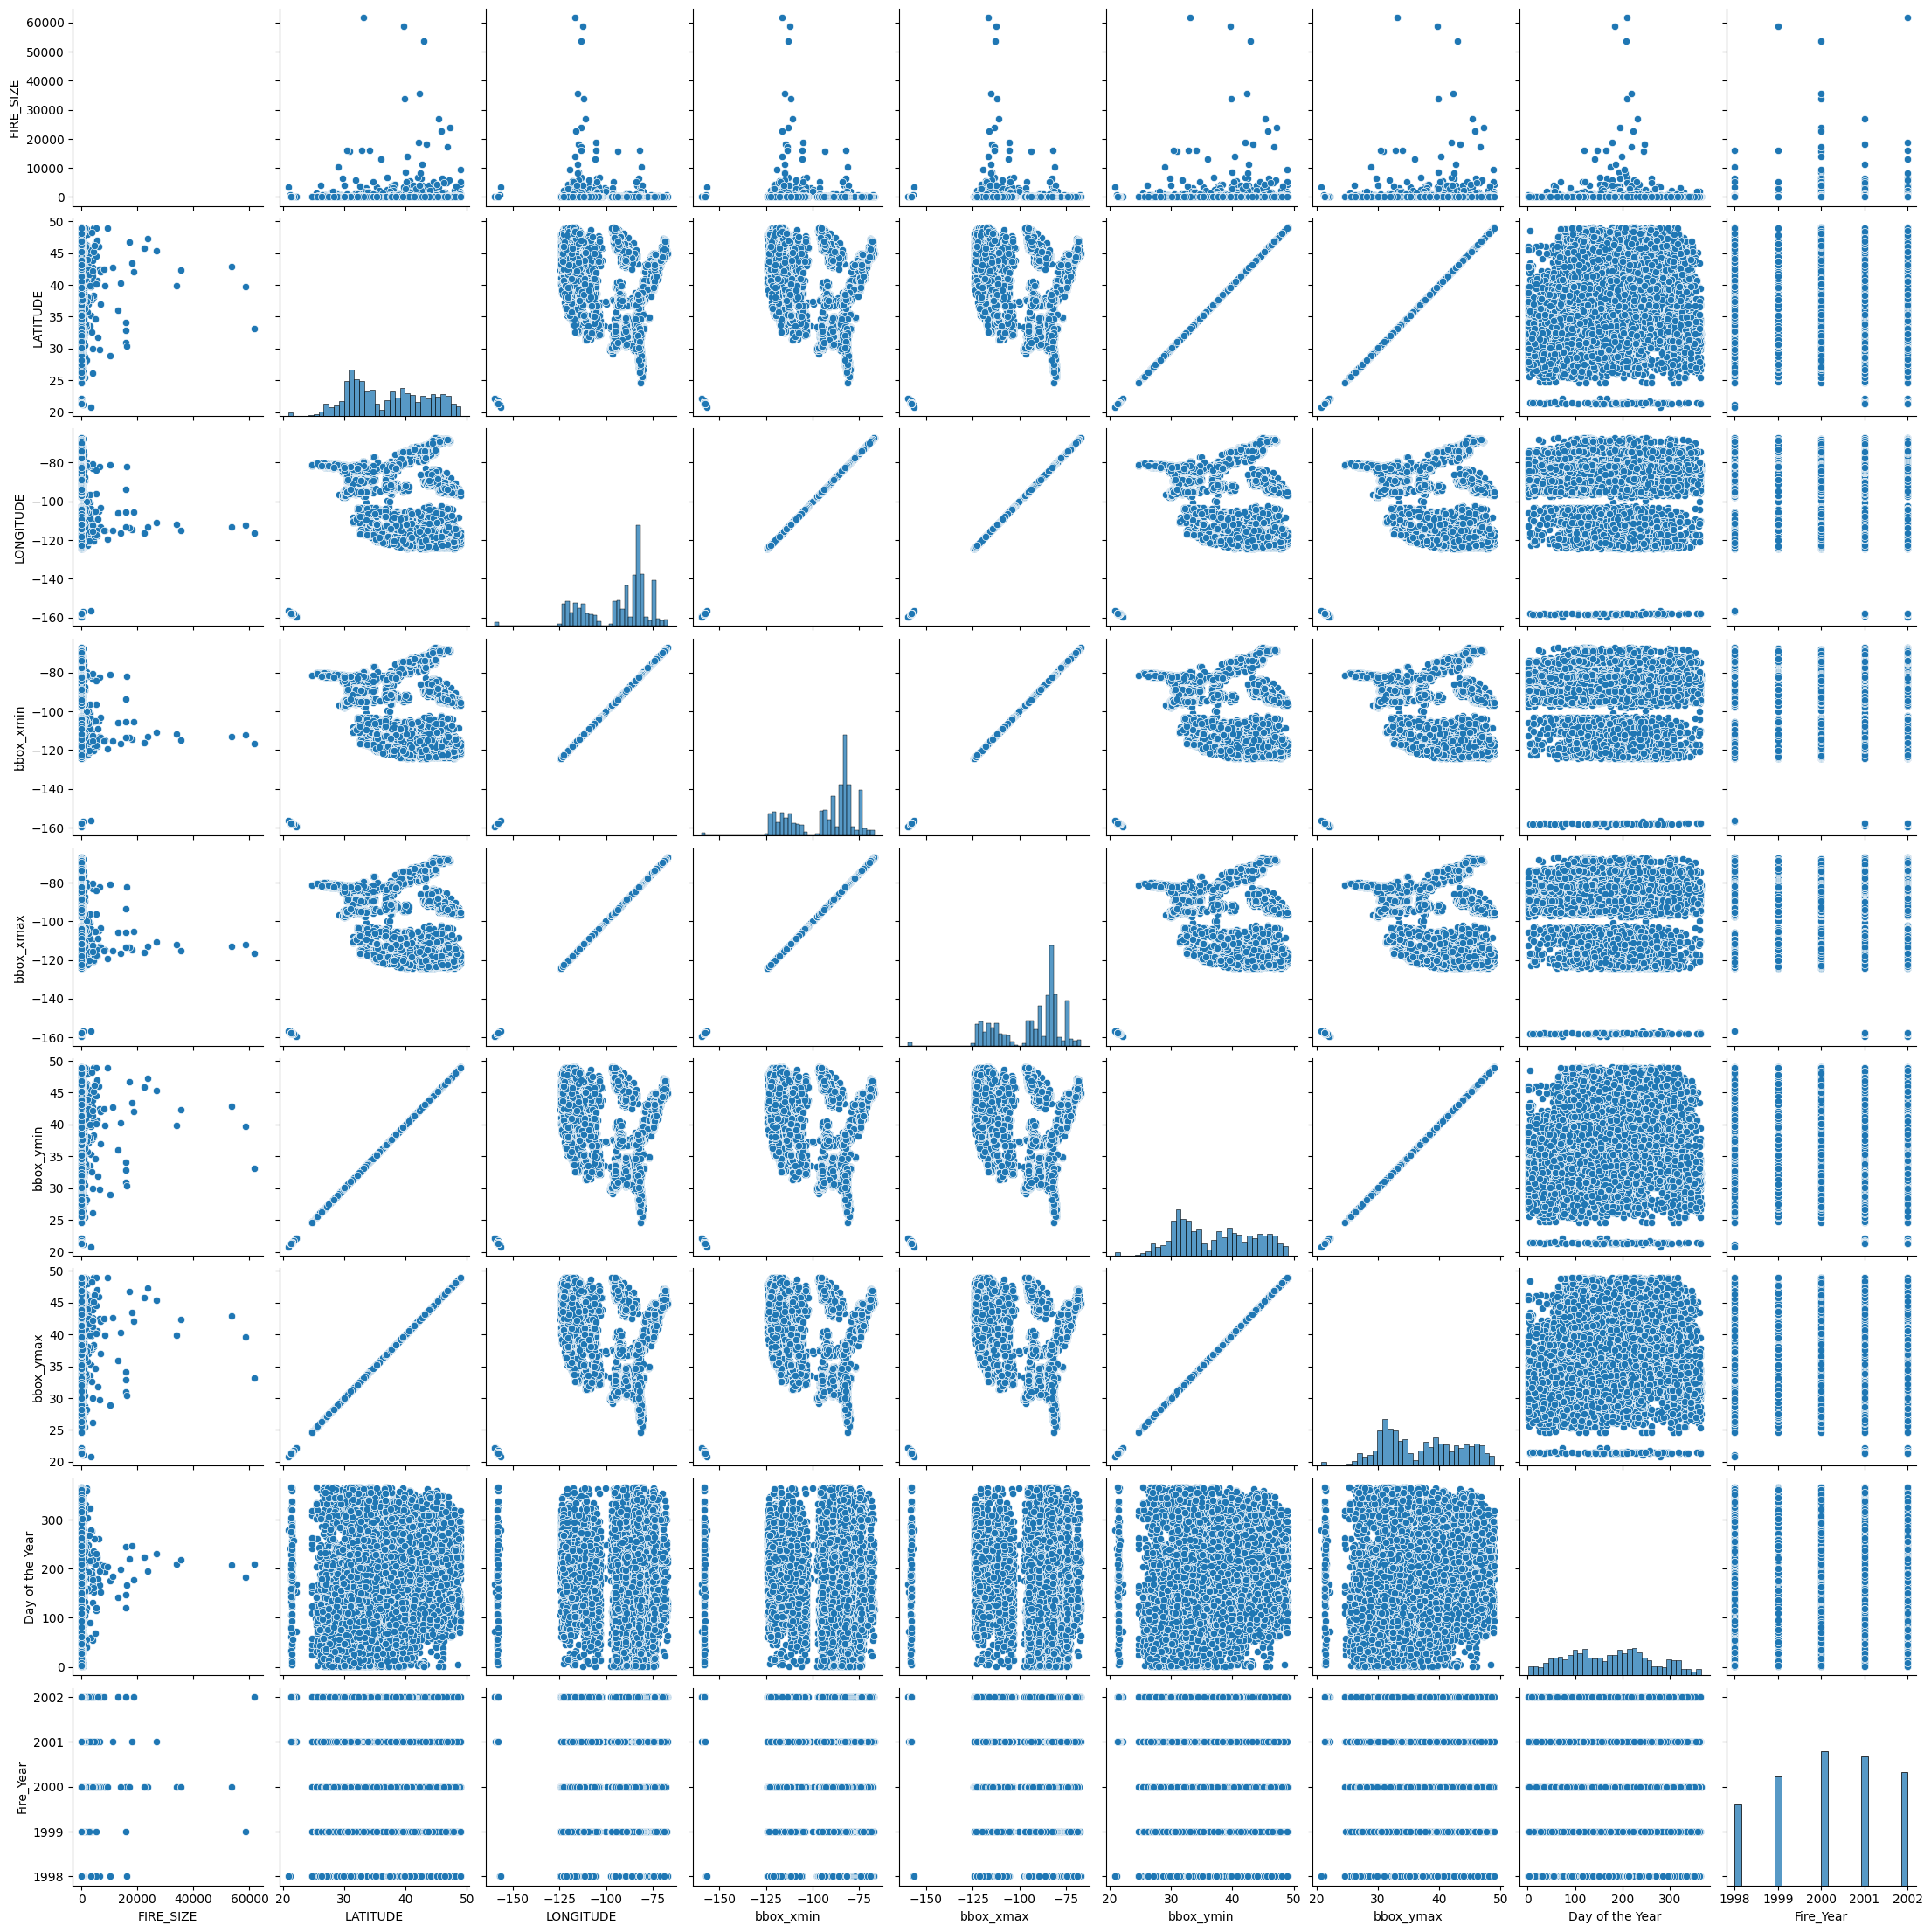

In [ ]:
sns.pairplot(df2[['FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',
                 'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time']].sample(frac = 0.1))

In [ ]:
sns.pairplot(df3[['FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',
                 'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time']].sample(frac = 0.1))

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7d6d1c8fdea0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.pairplot(df4[['FIRE_SIZE',           'LATITUDE',
                'LONGITUDE',          'bbox_xmin',          'bbox_xmax',
                'bbox_ymin',          'bbox_ymax',
                 'Discovery Time',    'Day of the Year',          'Fire_Year',
           'Contained Time']].sample(frac = 0.1))

<ipython-input-17-e3a22e81776b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['contained_same_day'].sample(frac=0.01))


<Axes: xlabel='contained_same_day', ylabel='Density'>

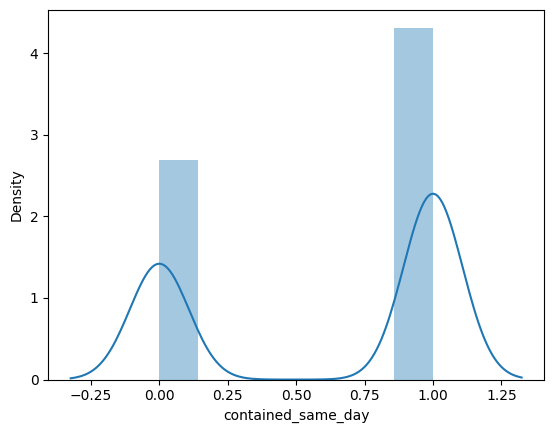

In [ ]:
sns.distplot(df1['contained_same_day'].sample(frac=0.01))

<ipython-input-18-580392242c72>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 1'].sample(frac=0.01))


<Axes: xlabel='Cause 1', ylabel='Density'>

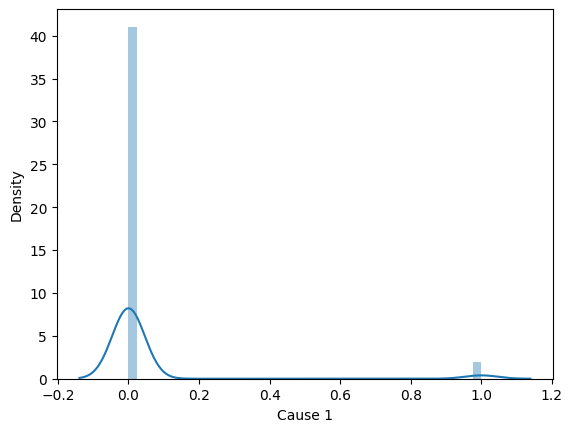

In [ ]:
sns.distplot(df1['Cause 1'].sample(frac=0.01))

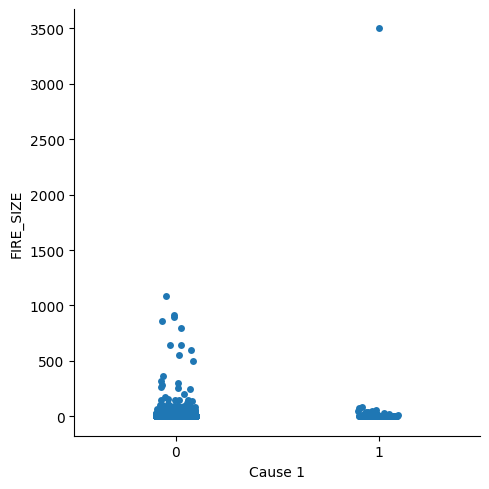

In [ ]:
sns.catplot(x='Cause 1', y = 'FIRE_SIZE', data=df1.sample(frac=0.01))

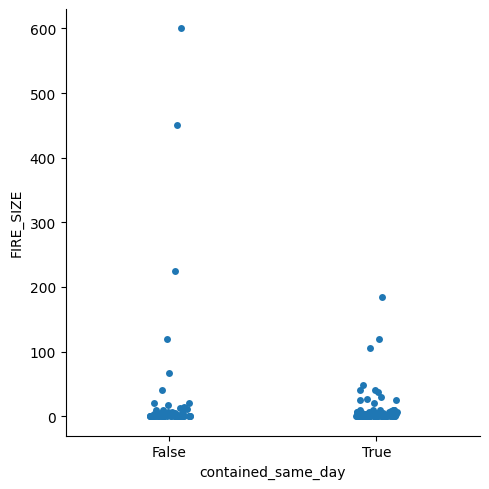

In [ ]:
sns.catplot(x='contained_same_day', y = 'FIRE_SIZE', data=df1.sample(frac=0.001))

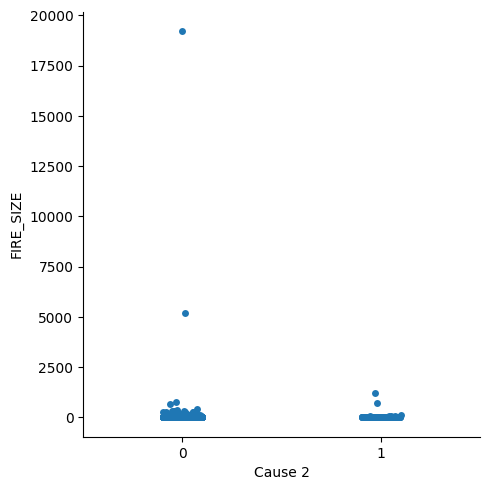

In [ ]:
sns.catplot(x='Cause 2', y = 'FIRE_SIZE', data=df1.sample(frac=0.01))

<ipython-input-19-b2602a9bde1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 2'].sample(frac=0.01))


<Axes: xlabel='Cause 2', ylabel='Density'>

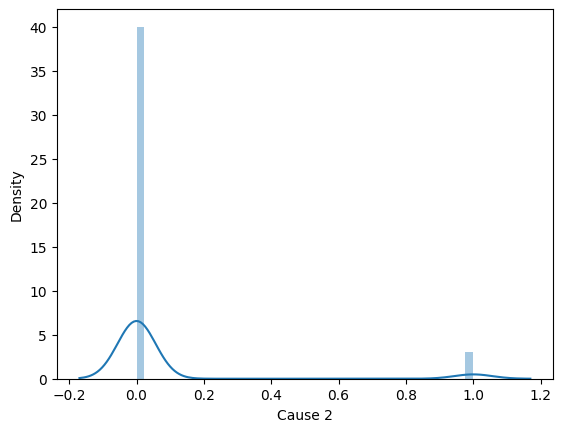

In [ ]:
sns.distplot(df1['Cause 2'].sample(frac=0.01))

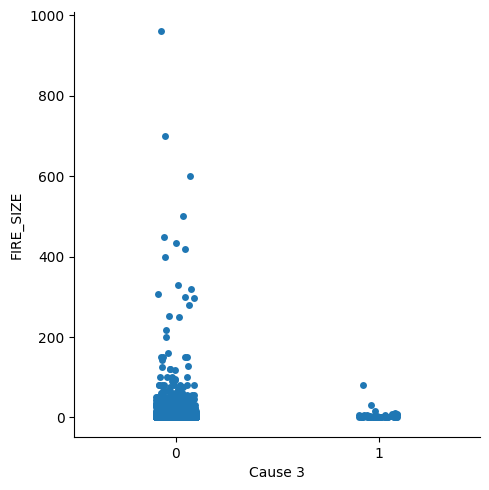

In [ ]:
sns.catplot(x='Cause 3', y = 'FIRE_SIZE', data=df1.sample(frac=0.01))

<ipython-input-20-dacffe05a9f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 3'].sample(frac=0.01))


<Axes: xlabel='Cause 3', ylabel='Density'>

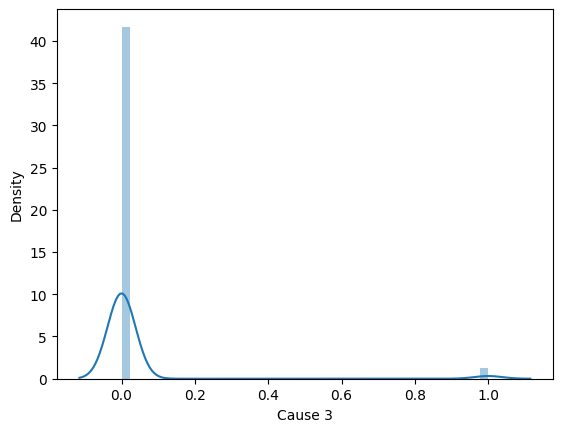

In [ ]:
sns.distplot(df1['Cause 3'].sample(frac=0.01))

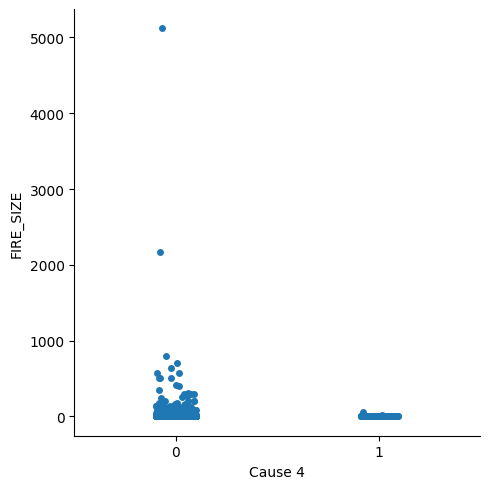

In [ ]:
sns.catplot(x='Cause 4', y = 'FIRE_SIZE', data=df1.sample(frac=0.01))

<ipython-input-21-0b22bd06e284>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 4'].sample(frac=0.01))


<Axes: xlabel='Cause 4', ylabel='Density'>

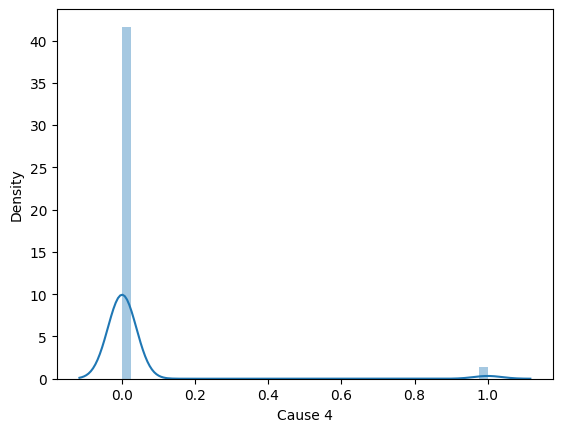

In [ ]:
sns.distplot(df1['Cause 4'].sample(frac=0.01))

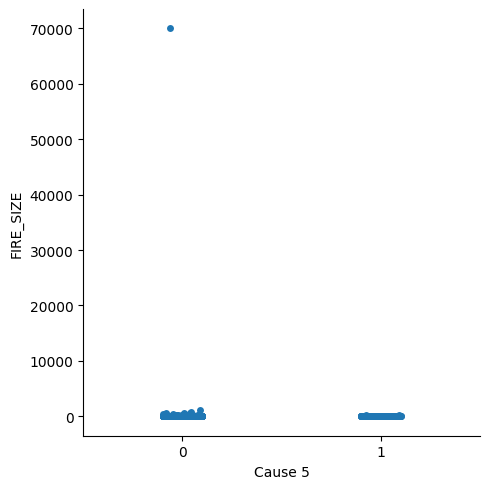

In [ ]:
sns.catplot(x='Cause 5', y = 'FIRE_SIZE', data=df1.sample(frac=0.01))

<ipython-input-22-d942dbfe1bbd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 5'].sample(frac=0.01))


<Axes: xlabel='Cause 5', ylabel='Density'>

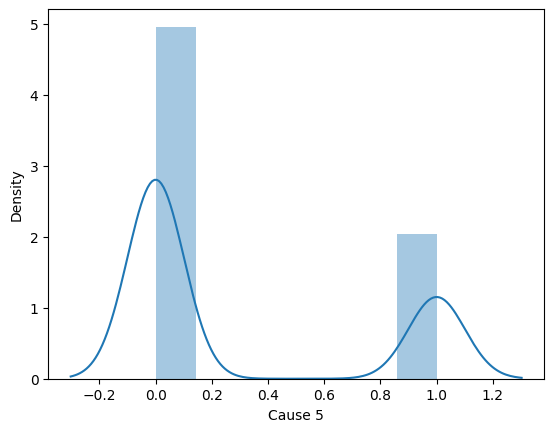

In [ ]:
sns.distplot(df1['Cause 5'].sample(frac=0.01))

<ipython-input-23-7f3f9a8761e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 6'].sample(frac=0.01))


<Axes: xlabel='Cause 6', ylabel='Density'>

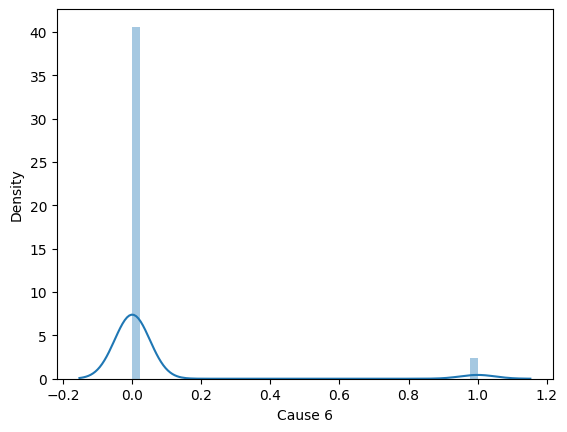

In [ ]:
sns.distplot(df1['Cause 6'].sample(frac=0.01))

<ipython-input-25-ab50c2de584d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 7'].sample(frac=0.01))


<Axes: xlabel='Cause 7', ylabel='Density'>

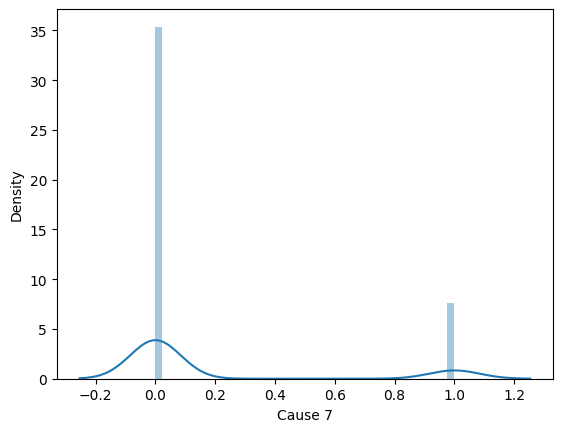

In [ ]:
sns.distplot(df1['Cause 7'].sample(frac=0.01))

<ipython-input-26-0fb161e91ebe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 8'].sample(frac=0.01))


<Axes: xlabel='Cause 8', ylabel='Density'>

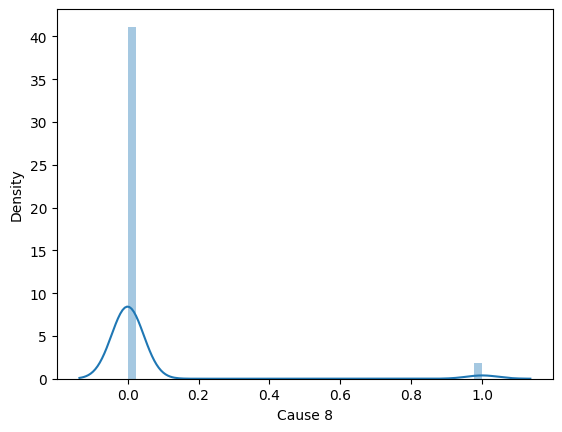

In [ ]:
sns.distplot(df1['Cause 8'].sample(frac=0.01))

<ipython-input-27-450903f847af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 9'].sample(frac=0.01))


<Axes: xlabel='Cause 9', ylabel='Density'>

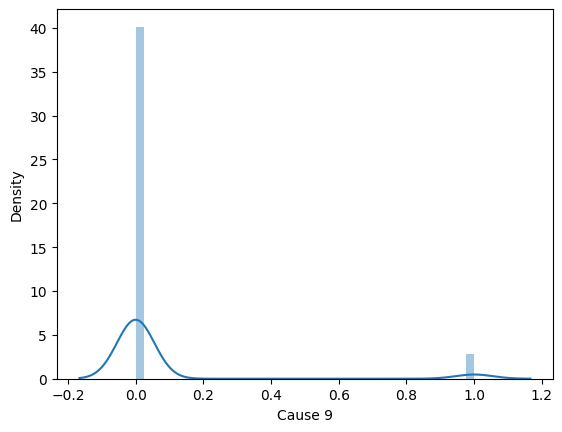

In [ ]:
sns.distplot(df1['Cause 9'].sample(frac=0.01))

<ipython-input-28-a76a05455ec9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 10'].sample(frac=0.01))


<Axes: xlabel='Cause 10', ylabel='Density'>

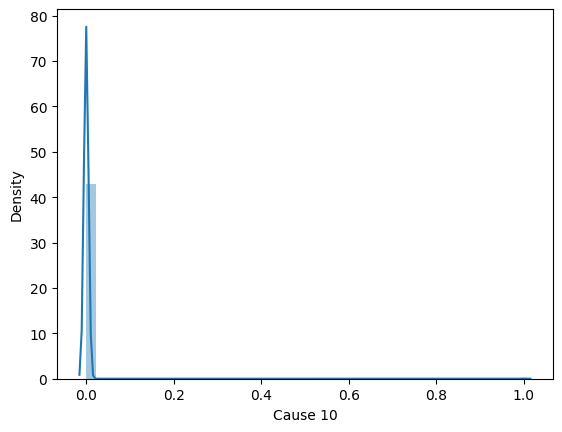

In [ ]:
sns.distplot(df1['Cause 10'].sample(frac=0.01))

<ipython-input-29-e58a834df5d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 11'].sample(frac=0.01))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Cause 11', ylabel='Density'>

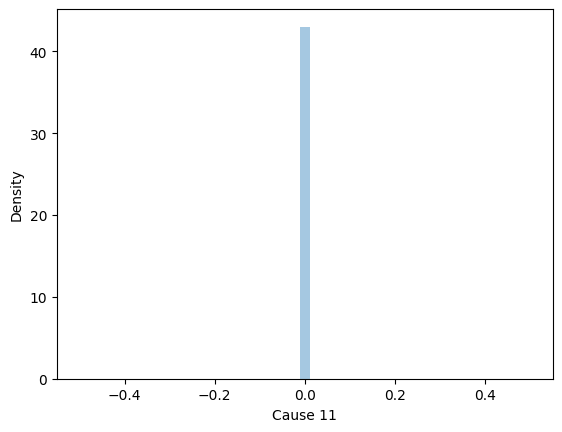

In [ ]:
sns.distplot(df1['Cause 11'].sample(frac=0.01))

<ipython-input-30-9f4b23b205fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 12'].sample(frac=0.01))
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Cause 12', ylabel='Density'>

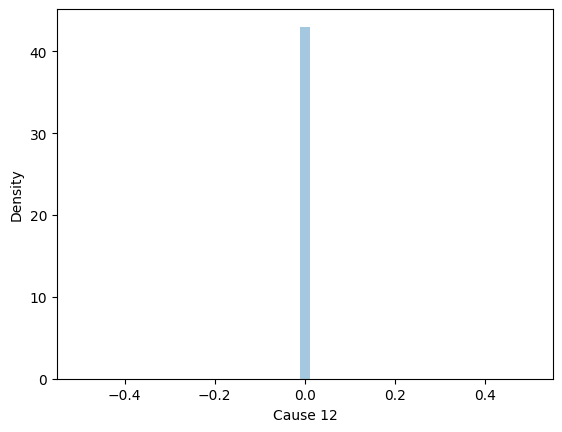

In [ ]:
sns.distplot(df1['Cause 12'].sample(frac=0.01))

<ipython-input-31-b16c375cf696>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Cause 13'].sample(frac=0.01))


<Axes: xlabel='Cause 13', ylabel='Density'>

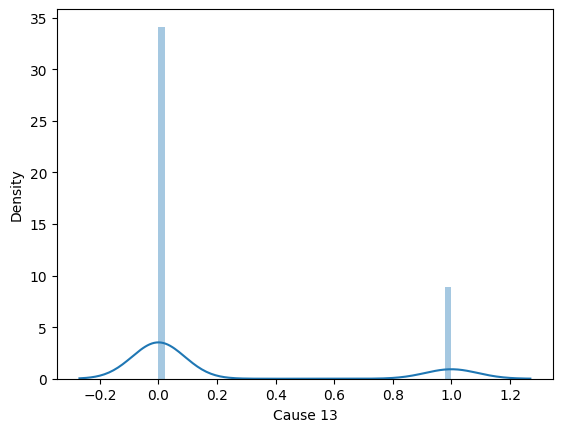

In [ ]:
sns.distplot(df1['Cause 13'].sample(frac=0.01))

## **OTHER CODE?**

In [ ]:
# df['STAT_CAUSE_CODE'].isna().sum()

# for i in range(1992, 2016):
#   fire_cause_one_hot = pd.get_dummies(df['STAT_CAUSE_CODE'][])
#   fire_cause_one_hot.rename(columns={1: "Cause 1", 2: "Cause 2", 3: "Cause 3", 4: "Cause 4", 5: "Cause 5", 6: "Cause 6",
#                                     7: "Cause 7", 8: "Cause 8", 9: "Cause 9", 10: "Cause 10", 11: "Cause 11", 12: "Cause 12", 13: "Cause 13"}, inplace=True)
#   fire_cause_one_hot.head()
#   df = df.join(fire_cause_one_hot)
#   df.head()